## 0.4. VISUALIZAÇÃO DE POTENCIA ESPECIFICA

O objetivo desse notebook é visualizar:
* Anos com dados nulos
* O comportamento da tag ao longo do tempo
* Distribuição estatística e boxplot

Requisitos para rodar esse notebook:
* É necessário rodar '1_preprocessamento'/'0.1_analise_tags_recebidas'

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%run ..\..\..\funcoes_base_global\funcoes_plot.py
%run ..\..\..\funcoes_base_global\plot_distribuicao_anual.py

%run ..\..\..\funcoes_base_global\mount_dataframe_from_files.py

In [2]:
input_path  = os.path.join('..','1_preprocessamento','out','')
output_path = os.path.join('out','')
if not os.path.exists(output_path): 
    os.mkdir(output_path)

In [75]:
tags_importantes =   {'302B':[],
                '302A':['FIC2601.PV','JI3401.PV','PotEspecifica'],
                '301B':[],
                '301A':[]}

In [76]:
dataframes_dir = ['df_vazao.csv.gz','df_outras.csv.gz']

dataframes_dir = [os.path.join(input_path,dfn) for dfn in dataframes_dir]

In [77]:
dataframes_dir

['..\\1_preprocessamento\\out\\df_vazao.csv.gz',
 '..\\1_preprocessamento\\out\\df_outras.csv.gz']

<b> Procura em dataframes_names as colunas selecionadas em tags_importantes </b>

In [78]:
columns_to_retrieve = tags_importantes['302A']

df = mount_dataframe_from_files(dataframes_dir,columns_to_retrieve)
         

    

FIC2601.PV found in ..\1_preprocessamento\out\df_vazao.csv.gz
Usecols do not match columns, columns expected but not found: ['JI3401.PV']
skiping JI3401.PV for ..\1_preprocessamento\out\df_vazao.csv.gz
Usecols do not match columns, columns expected but not found: ['PotEspecifica']
skiping PotEspecifica for ..\1_preprocessamento\out\df_vazao.csv.gz
Usecols do not match columns, columns expected but not found: ['FIC2601.PV']
skiping FIC2601.PV for ..\1_preprocessamento\out\df_outras.csv.gz
JI3401.PV found in ..\1_preprocessamento\out\df_outras.csv.gz
Usecols do not match columns, columns expected but not found: ['PotEspecifica']
skiping PotEspecifica for ..\1_preprocessamento\out\df_outras.csv.gz
Mounting final DF


In [79]:
df.head(3)

,FIC2601.PV,JI3401.PV
Date,,
2009-01-01 00:00:00,0.196,0.0
2009-01-01 00:01:00,0.196,0.0
2009-01-01 00:02:00,0.196,0.0


### 1. Visualização de Dados Nulos

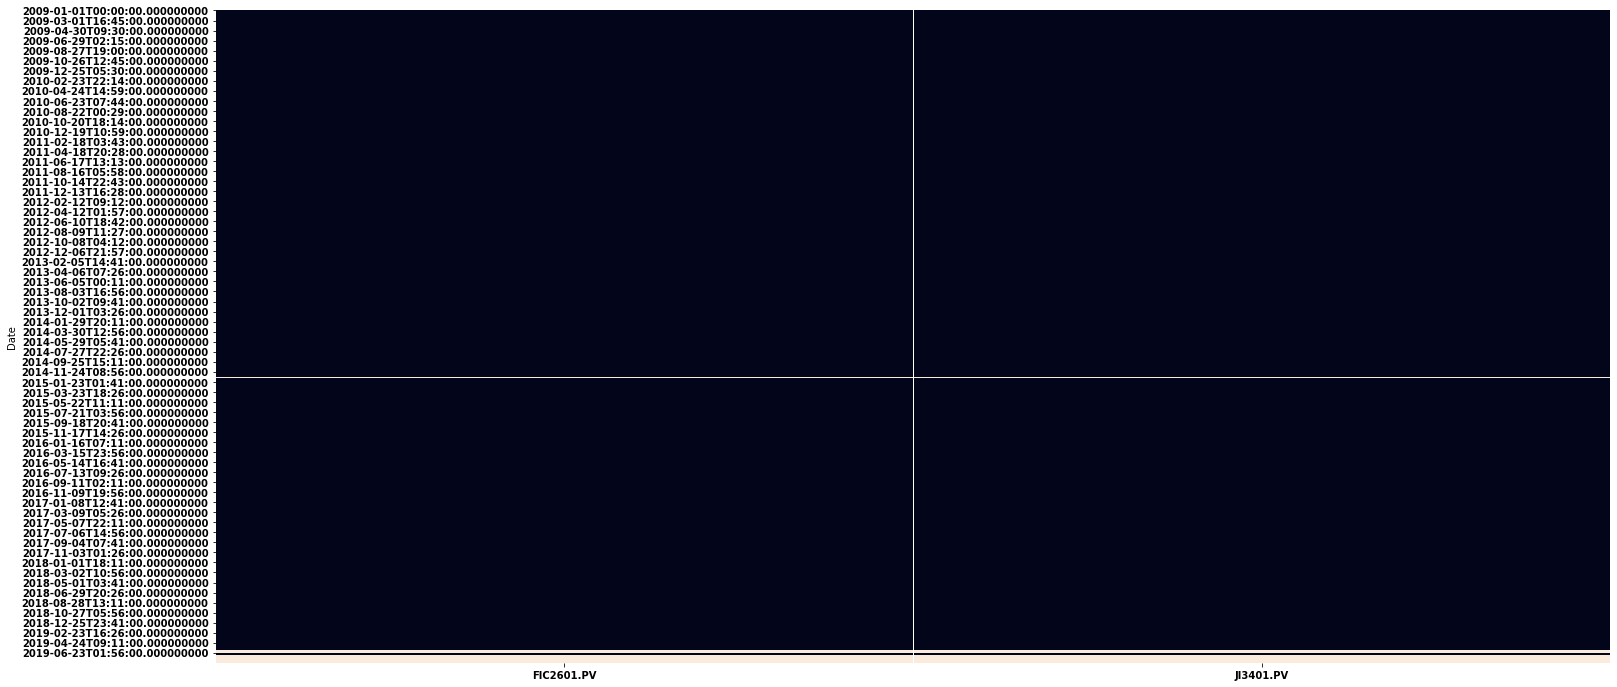

In [26]:
plt.figure(figsize = [25,12])
sns.heatmap(df[tags_importantes['302A']].isnull(), cbar = False)

#### Adiciona Potência Especifica ao DF

In [83]:
df['PotEspecifica'] = df['JI3401.PV']/df['FIC2601.PV']

### 2. Visualização Temporal

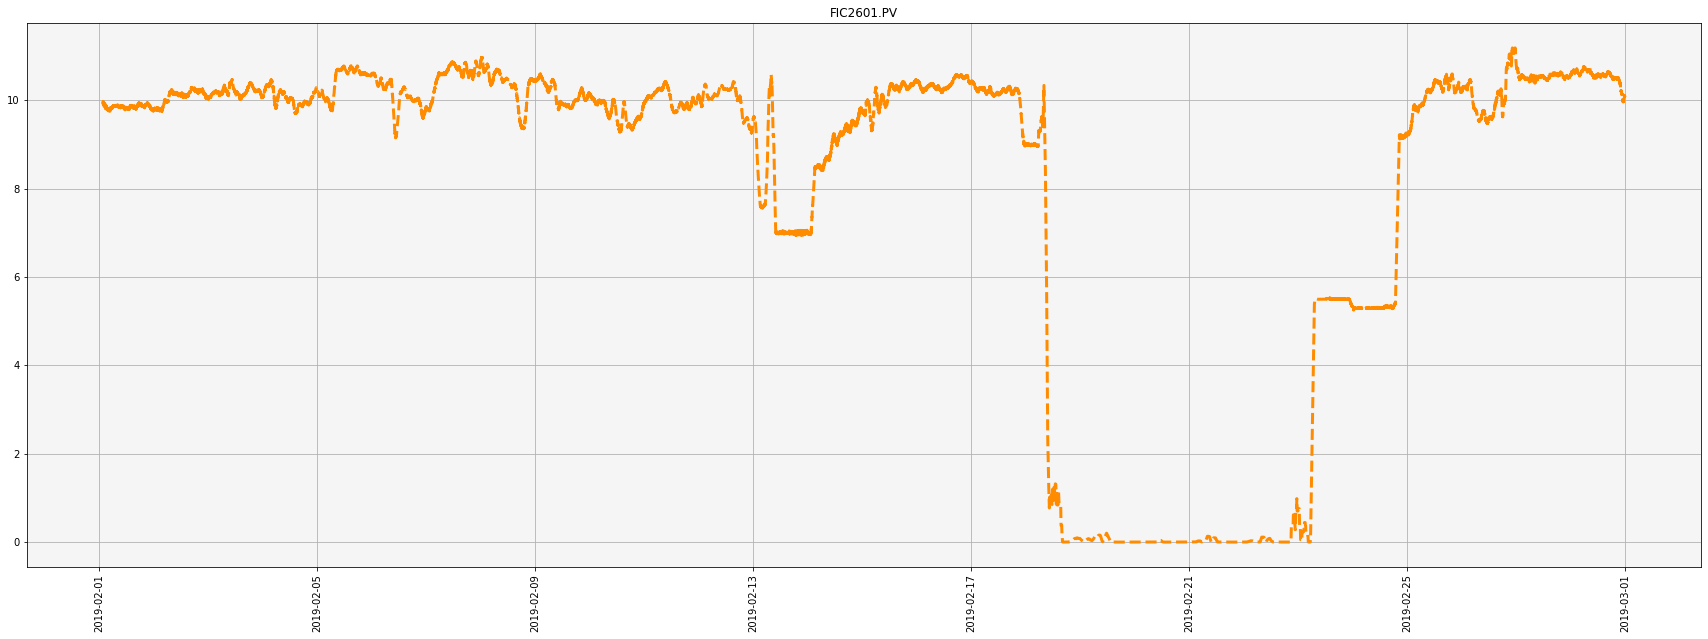

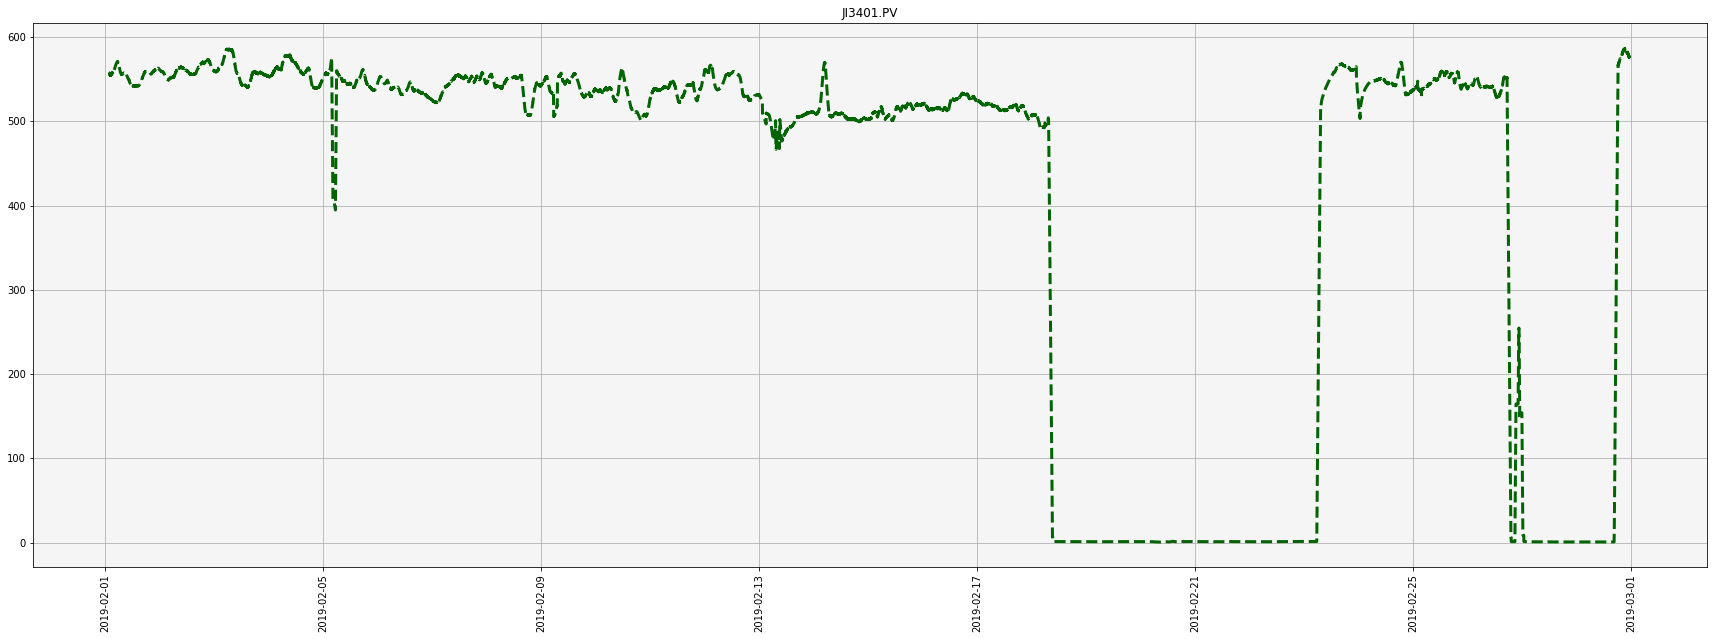

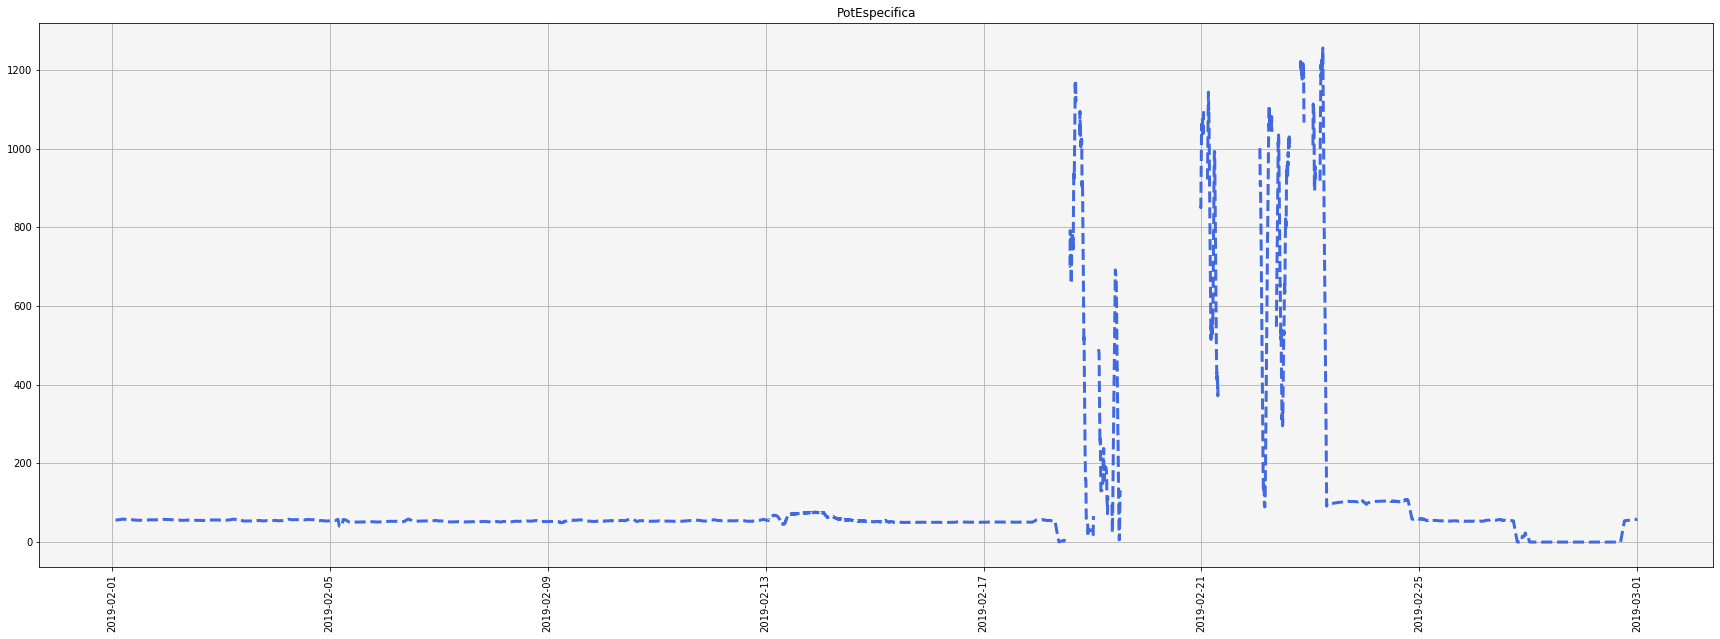

In [9]:
#Escolha das Datas de Iníco e Fim e da quantidade de pontos para a média móvel

inicio_data = '2019-02-01 00:00:00'
fim_data = '2019-03-01 00:00:00'
qtd_pontos = 100

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

dfw_filtered = df[(df.index > start_date) & (df.index < end_date) ].rolling(window = qtd_pontos).mean();

colors = ['darkorange', 'darkgreen', 'royalblue', 'salmon', 'firebrick','teal','sandybrown',
          'dodgerblue', 'crimson', 'darkolivegreen', 'skyblue', 'mediumpurple','indianred', 
          'darkcyan', 'chocolate', 'cornflowerblue', 'tan', 'darkblue', 'gold', 'darkgray']

#Plotagem da Entrada
for i in range(len(df.columns)):
    fig , ax = plt.subplots(figsize = [30, 10]);
    ax.set_facecolor(color = 'whitesmoke')
    ax.set_title(df.columns[i])
    ax.plot(dfw_filtered[df.columns[i]], color = colors[i], lw = 3, linestyle = '--')
    ax.xaxis.set_tick_params(rotation = 90)
    ax.grid(True)
    name = df.columns[i]
    plt.savefig(os.path.join('out',name+'.png'), dpi = 200)
    plt.show()


### 3. Visualizações Estatísticas

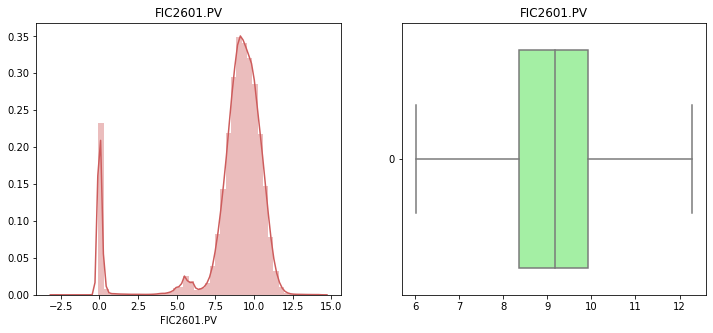

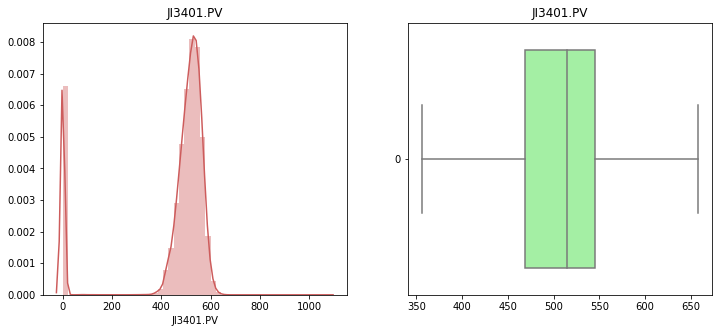

In [10]:
df_plot = df.dropna(axis = 1, how = 'all')

for i in range(len(tags_importantes['302A'])):
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(tags_importantes['302A'][i])
    axes[1].set_title(tags_importantes['302A'][i])
    sns.distplot(df_plot[tags_importantes['302A'][i]].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_plot[tags_importantes['302A'][i]].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

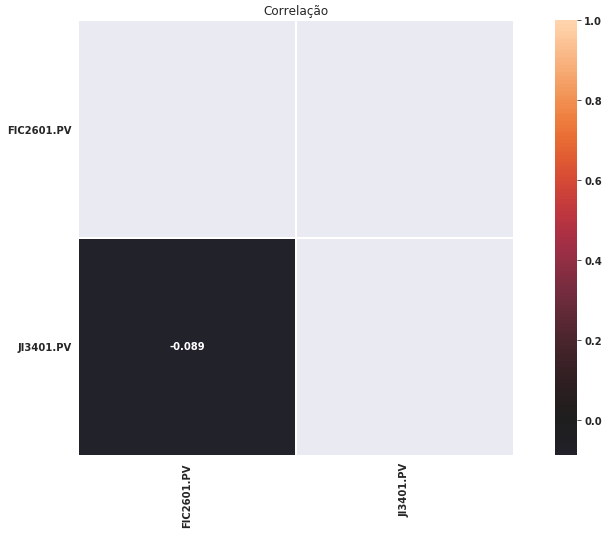

In [31]:
inicio_data = '2018-01-01 00:00:00'
fim_data = '2019-01-01 00:00:00'

#predict_1 = 'TI3409_1.PV'
#df[predict_1] = df['TI3409.PV'].shift(1000)
#df_plot = df.dropna(axis = 1, how = 'all')

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

#tags_temp['302A'].append(predict_1)

corr = df_plot[tags_importantes['302A']][(df_plot.index >= start_date) & (df_plot.index <= end_date)].dropna().corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style('dark'):
    plt.figure(figsize = [15, 8])
    plt.title('Correlação')
    sns.heatmap(corr, mask = mask, center = 0, annot = True, square = True, linewidths = .5)
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 0) 

#### 4 Drop de valores outliers

In [87]:
df =  df[ (df['JI3401.PV'] > 200) & (df['JI3401.PV'] < 800) & (df['FIC2601.PV'] > 2.5) & (df['FIC2601.PV'] < 15)]

In [88]:
df['year'] = df.index.year

In [89]:
df.columns

Index(['FIC2601.PV', 'JI3401.PV', 'year', 'PotEspecifica'], dtype='object')

<Figure size 1080x576 with 0 Axes>

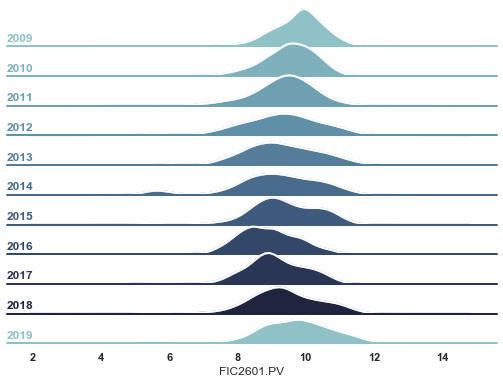

<Figure size 1080x576 with 0 Axes>

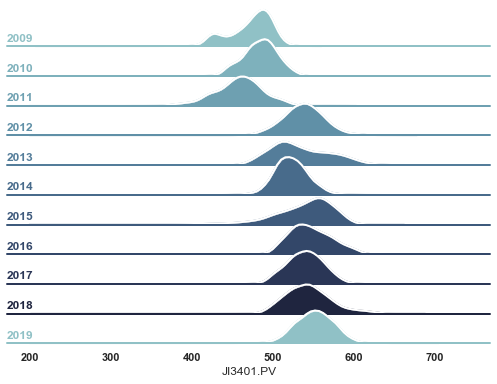

<Figure size 1080x576 with 0 Axes>

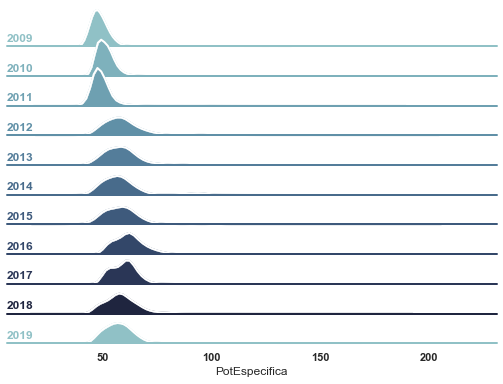

In [90]:
for i in tags_importantes['302A']:
    plot_distribuicao_anual(df,i,'out')


#### 5. Visualizacao Geral

(4049889, 3)


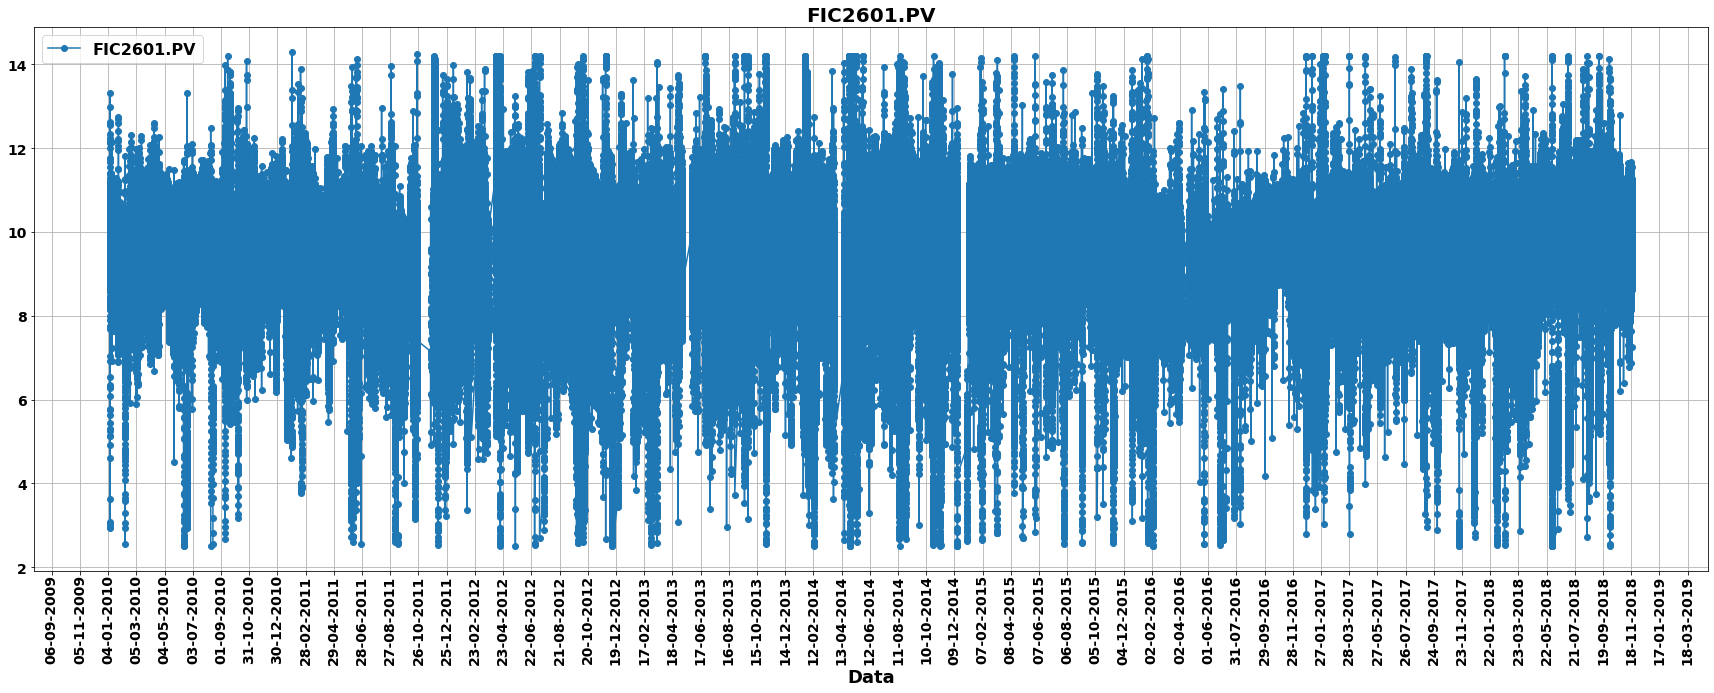

(4049889, 3)


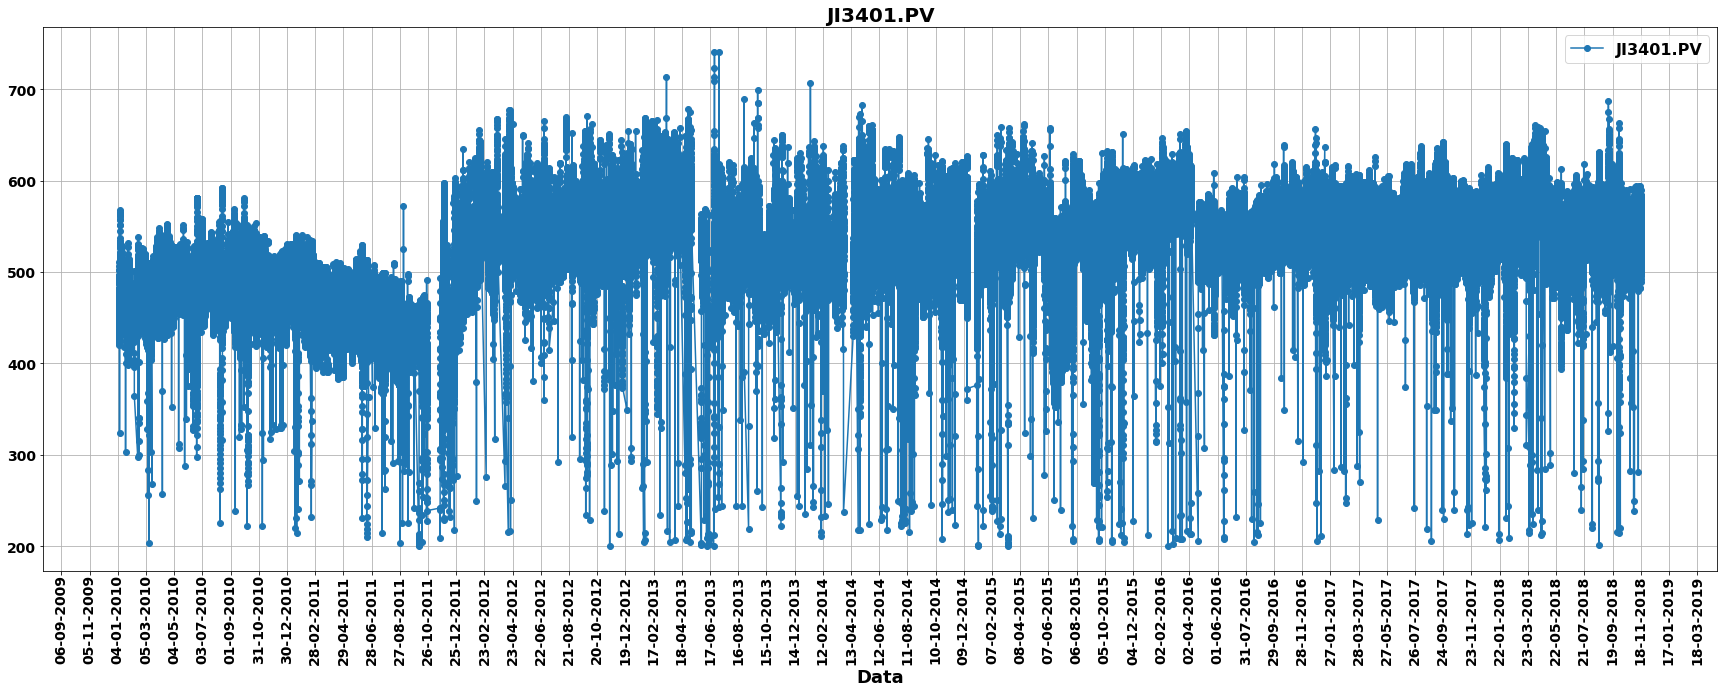

(4049889, 3)


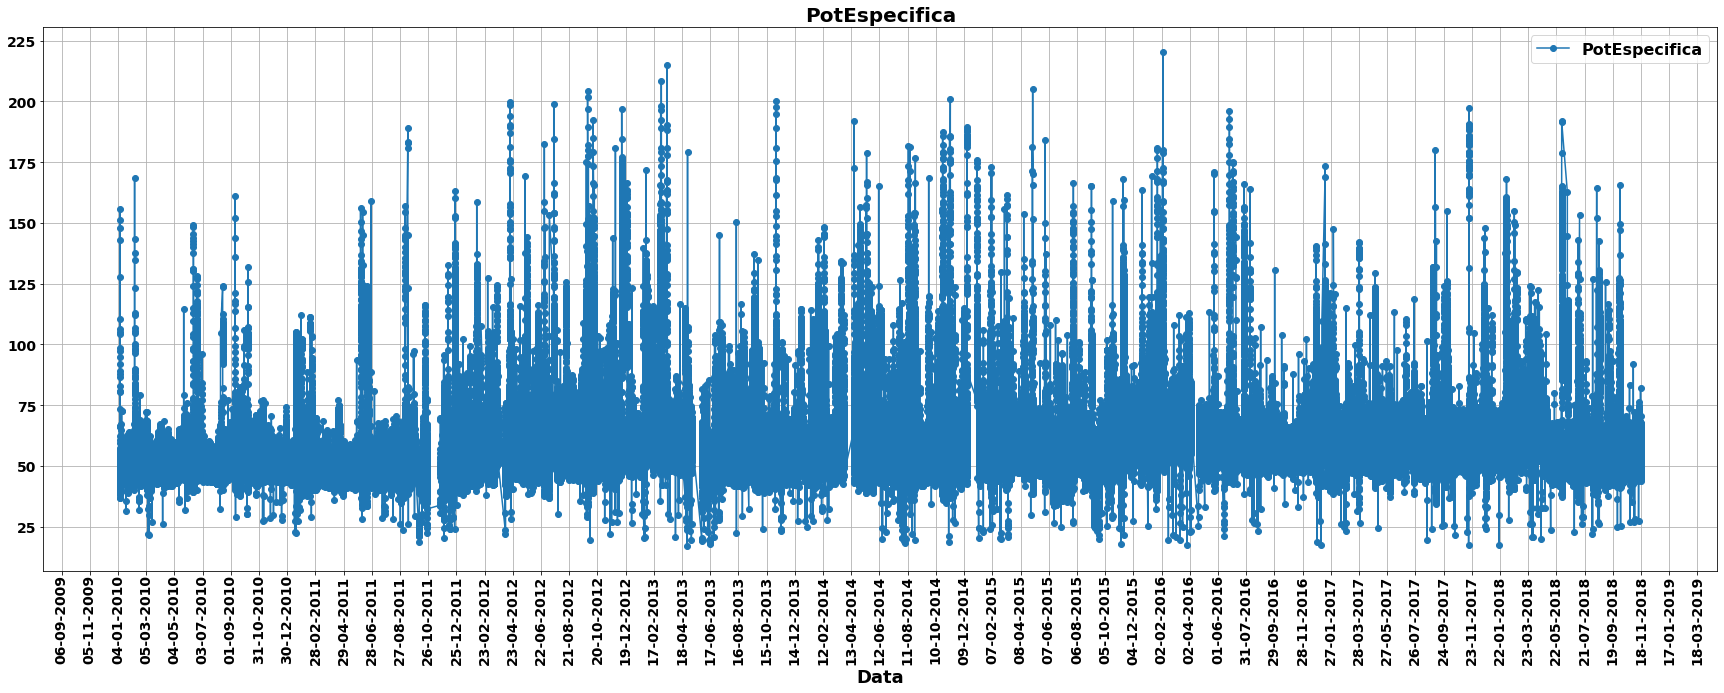

In [20]:
start_date = '01/01/2010'
end_date = '01/01/2019'

for var in df.columns:
    plot_variables_full(df,[var],start_date,end_date, days_interval=60)

#### 6. Zoom anos 2011 - 2012

(850362, 3)


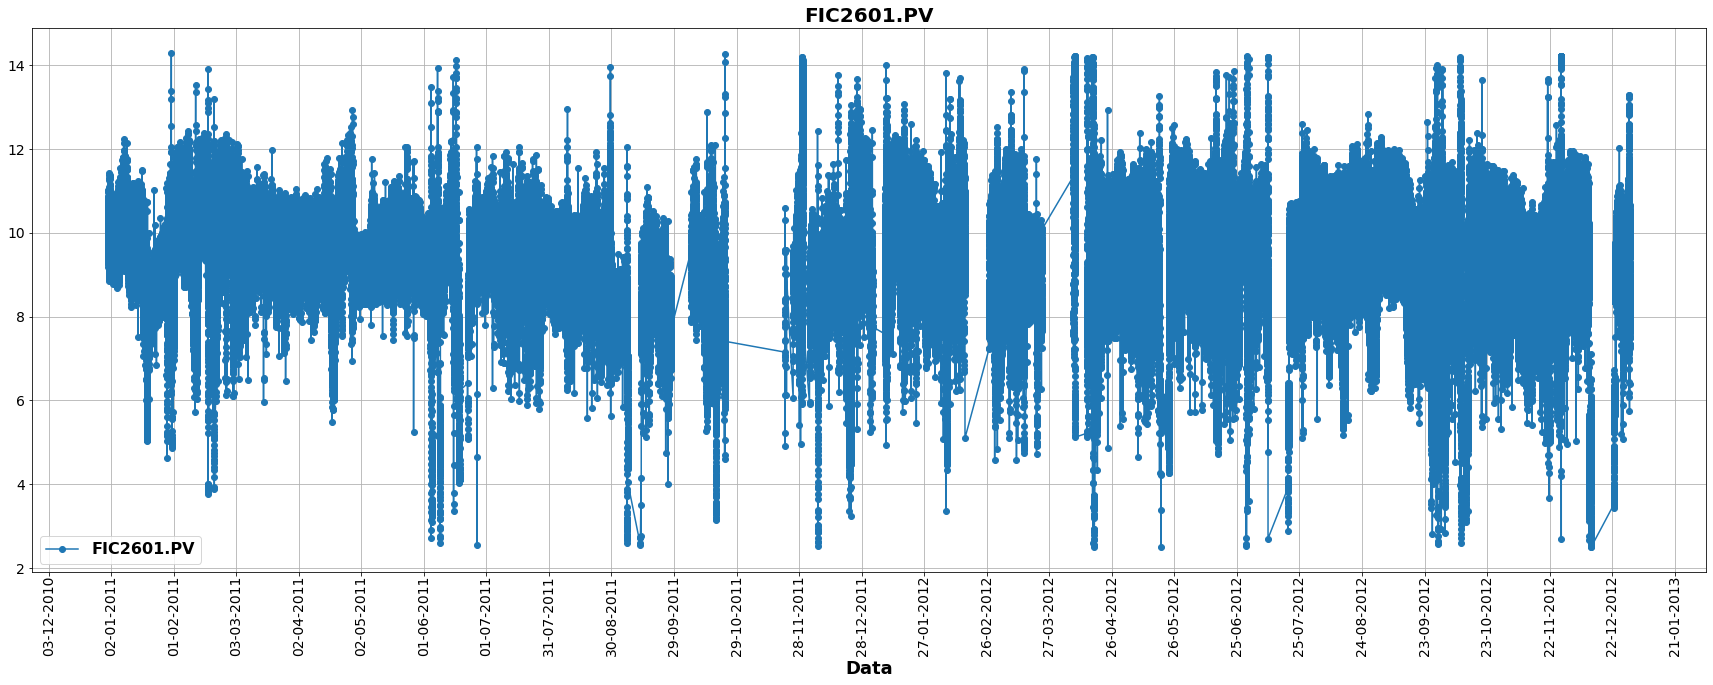

(850362, 3)


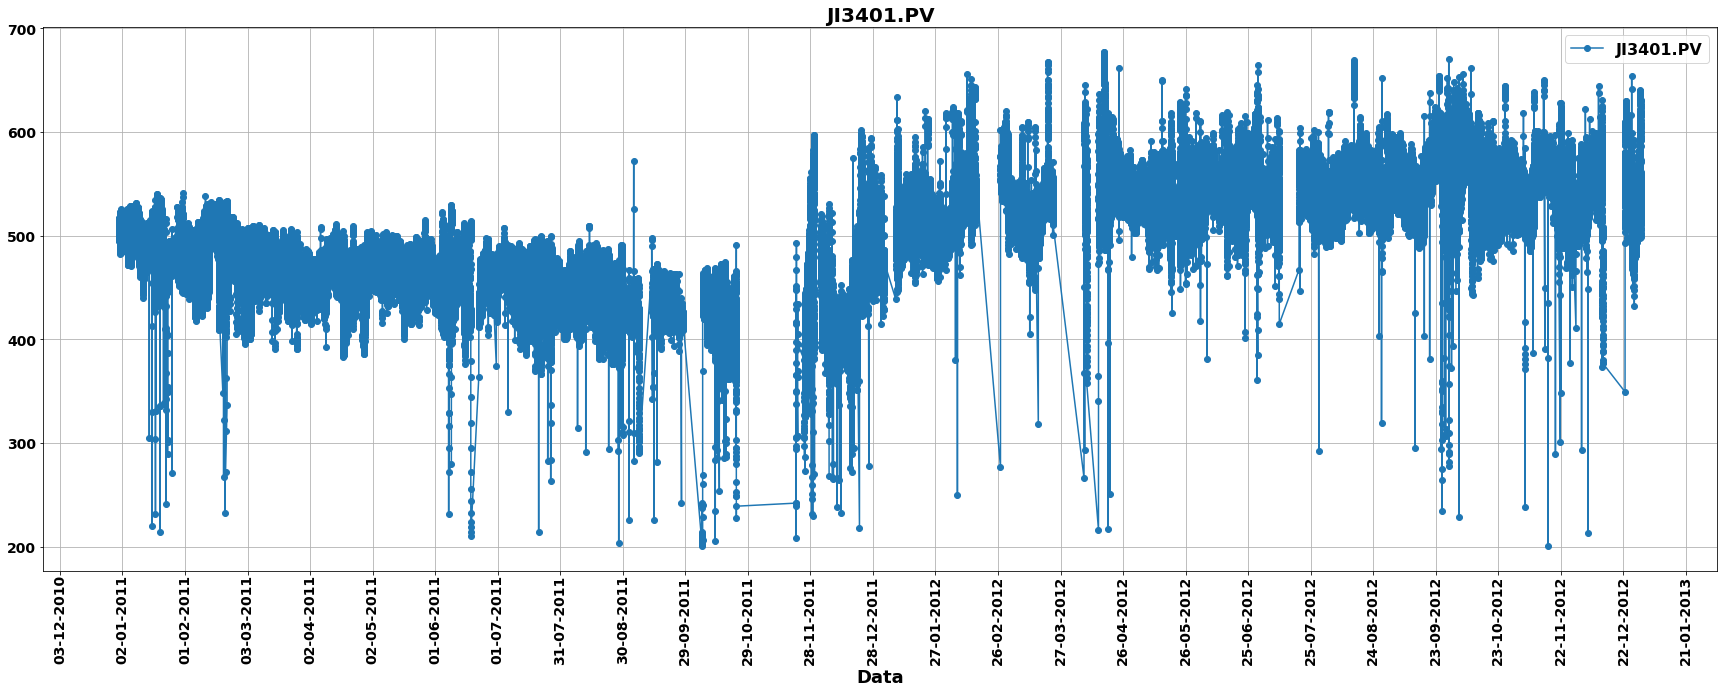

(850362, 3)


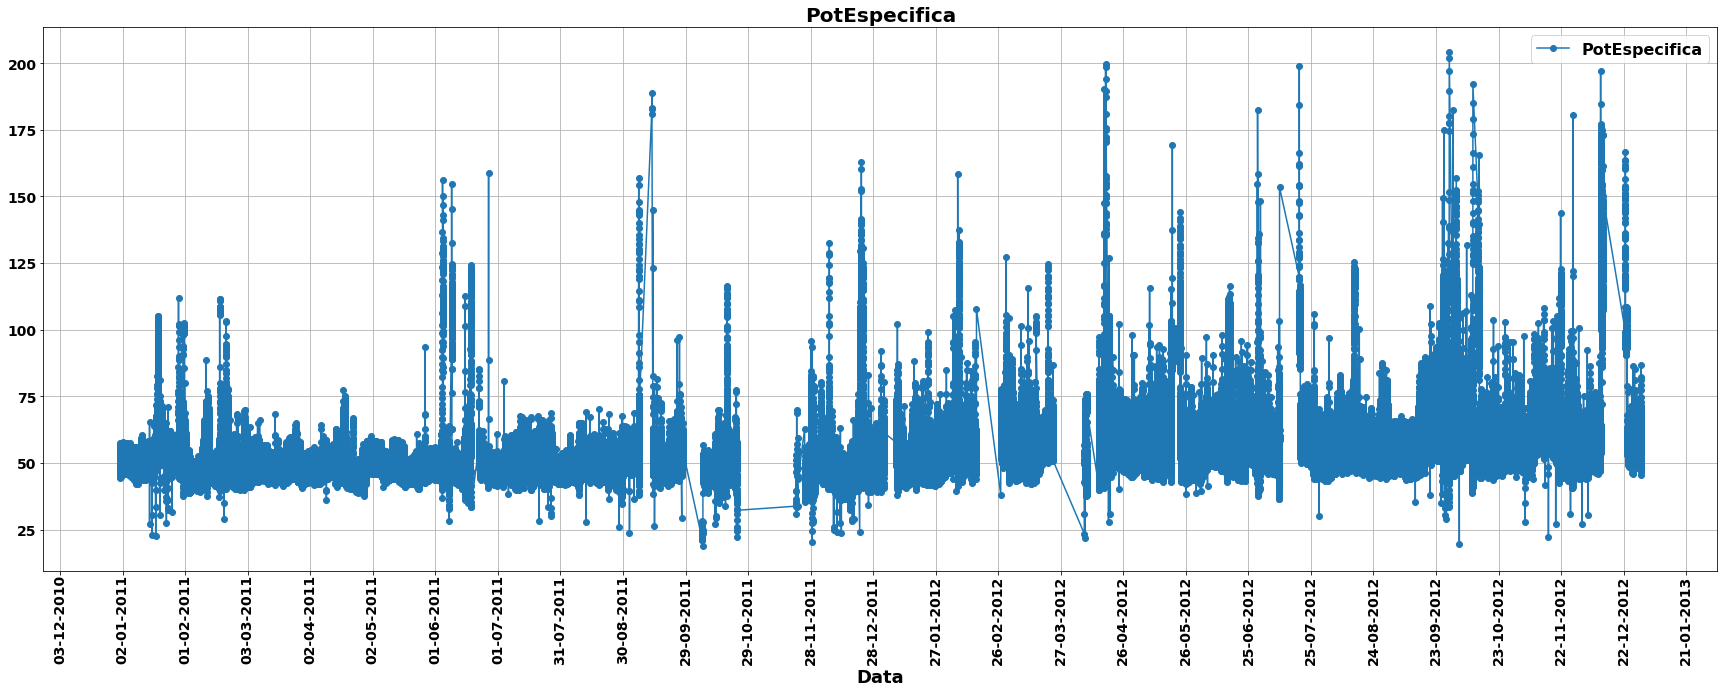

In [13]:
start_date = '01/01/2011'
end_date = '01/01/2013'

for var in df.columns:
    plot_variables_full(df,[var],start_date,end_date, days_interval=30)

#### 6. Zoom anos 2015 - 2016

(488995, 3)


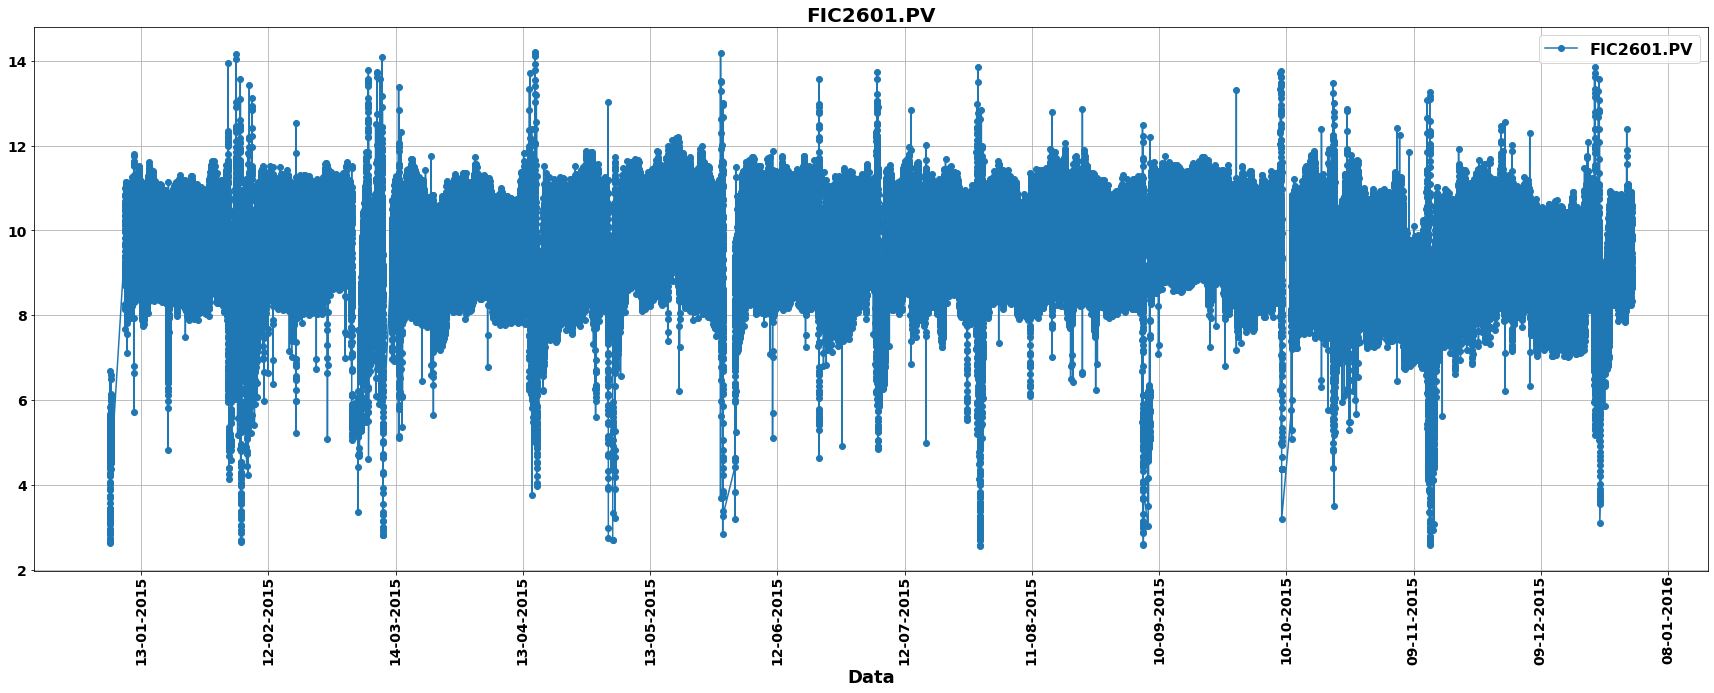

(488995, 3)


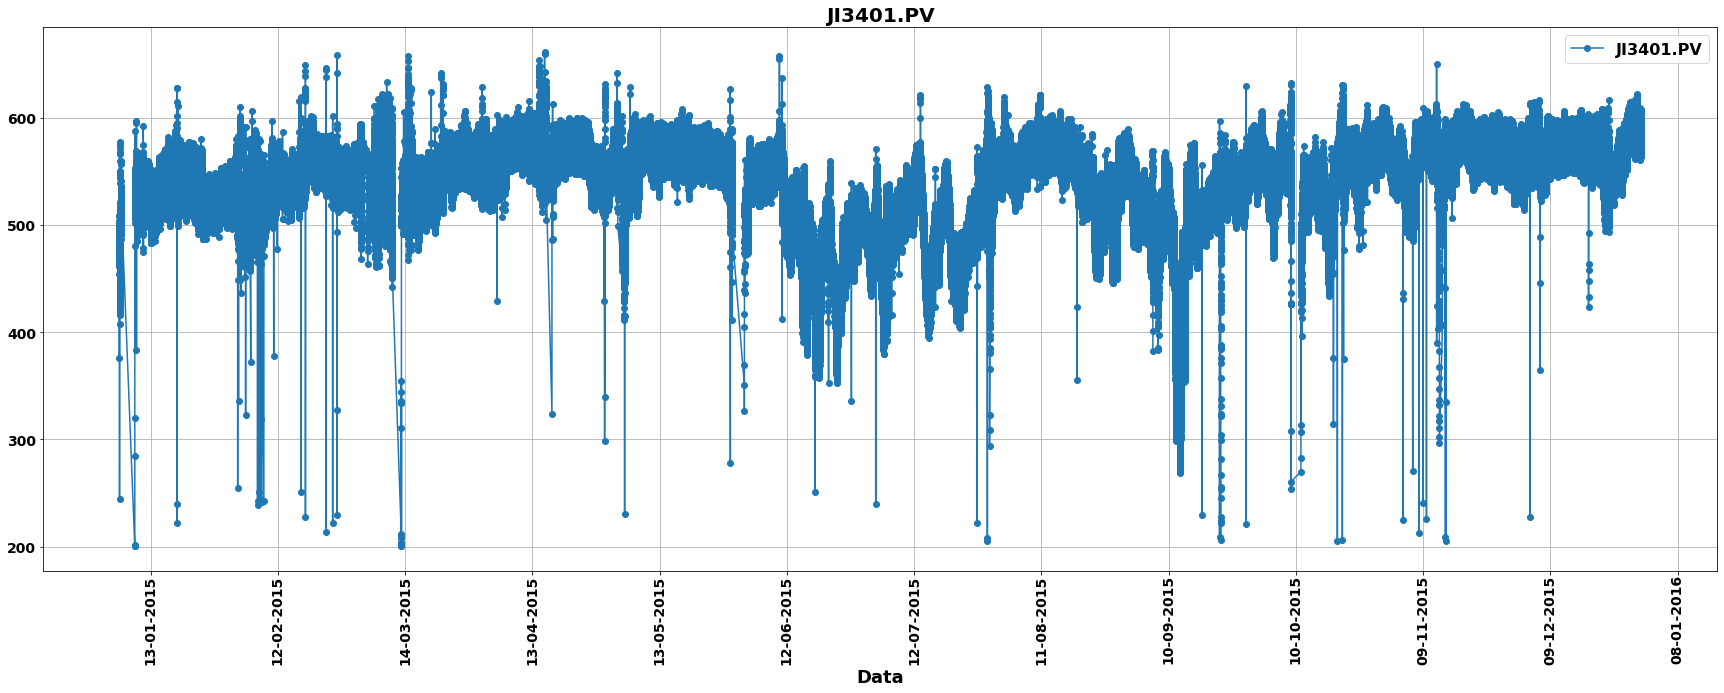

(488995, 3)


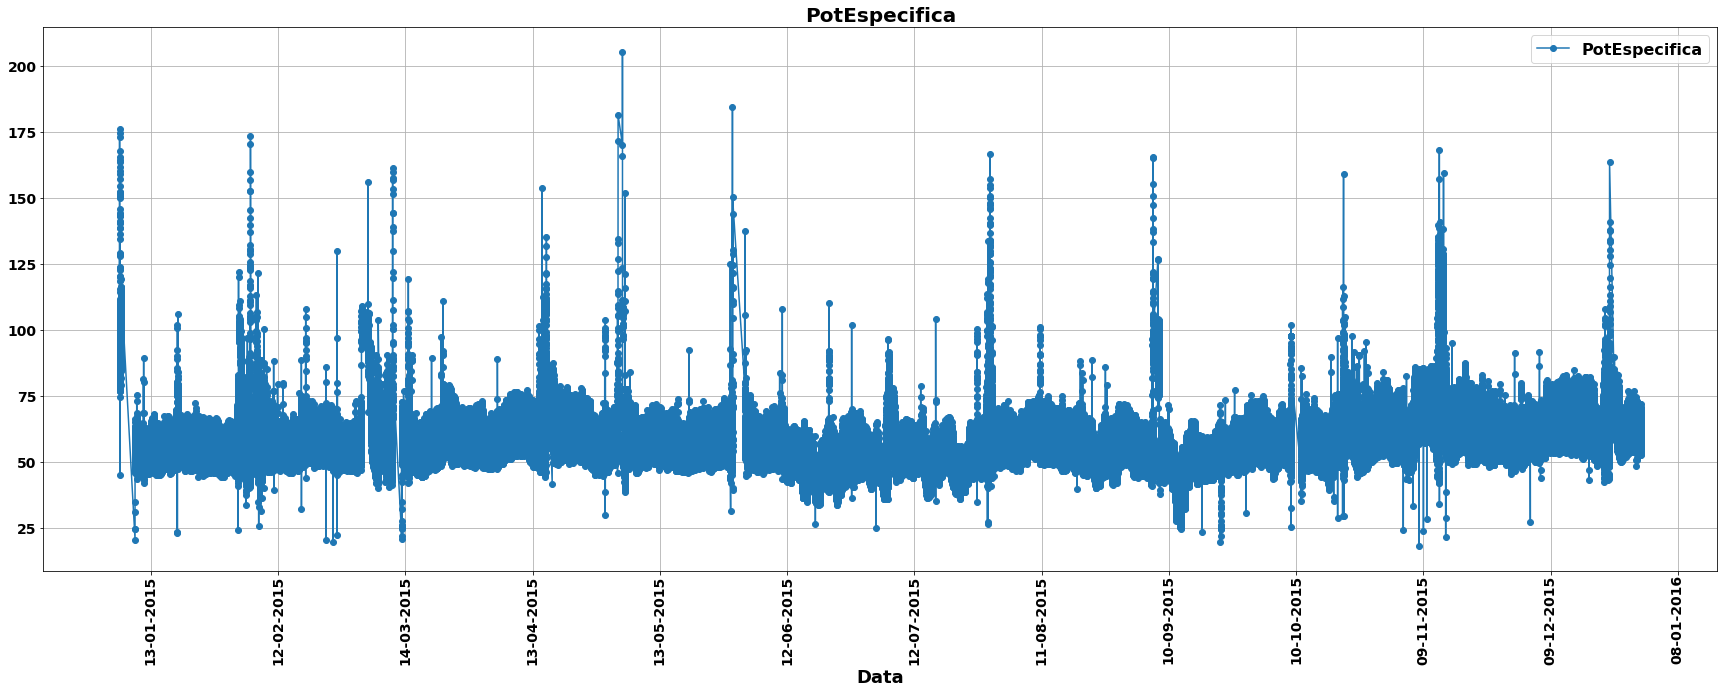

In [17]:
start_date = '01/01/2015'
end_date = '01/01/2016'

for var in df.columns:
    plot_variables_full(df,[var],start_date,end_date, days_interval=30)

#### 6. Zoom anos 2018 - 2019

(400739, 3)


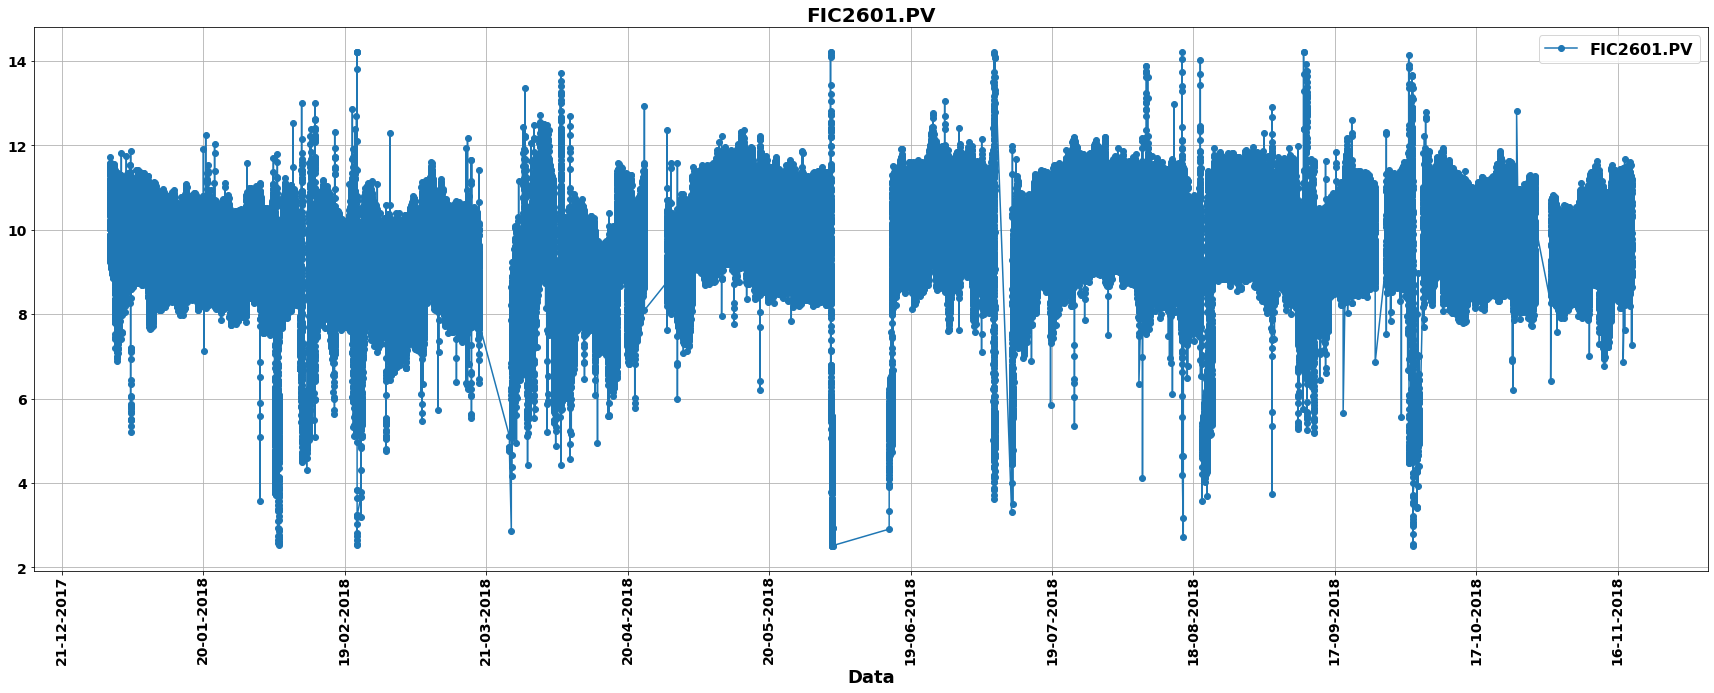

(400739, 3)


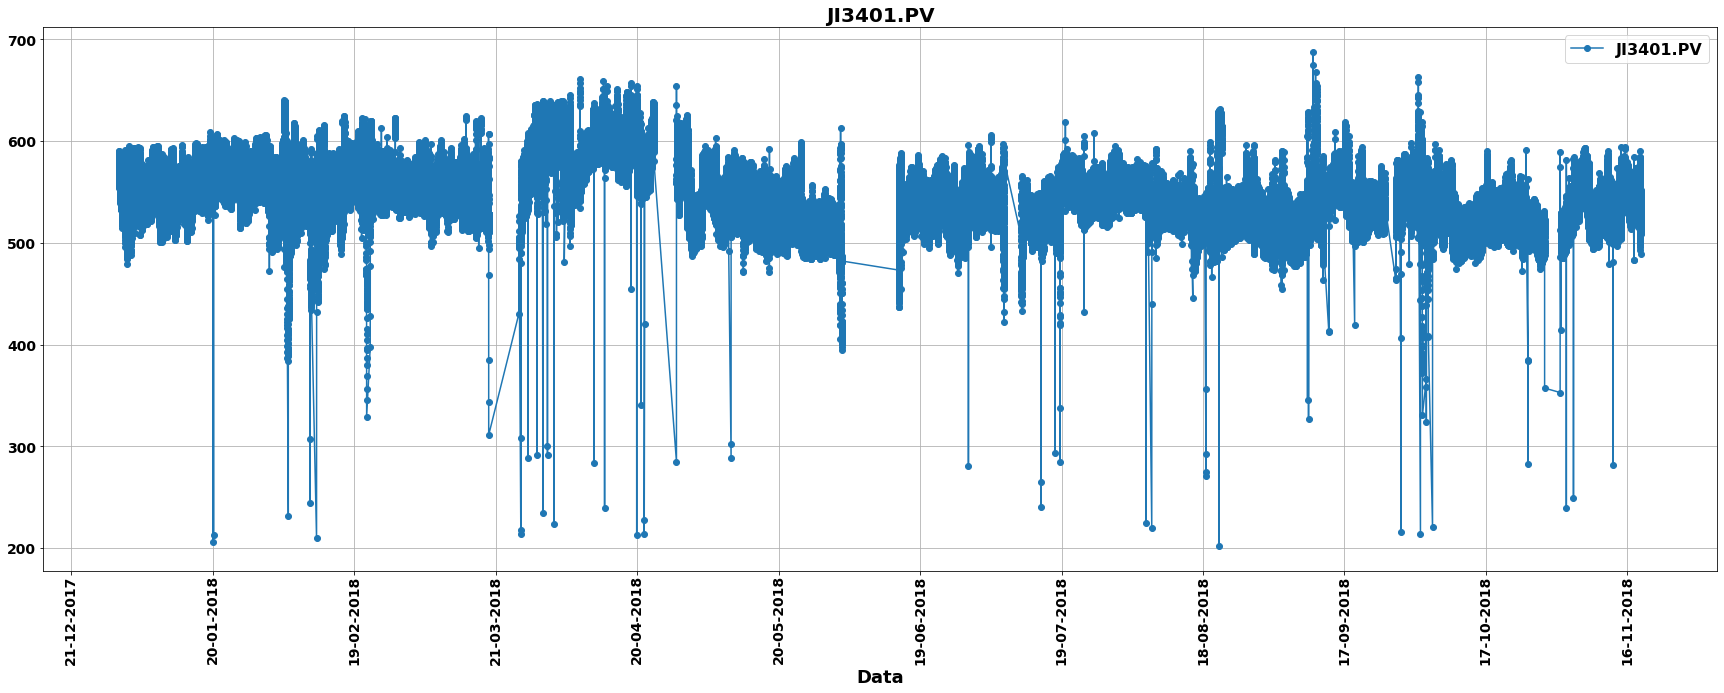

(400739, 3)


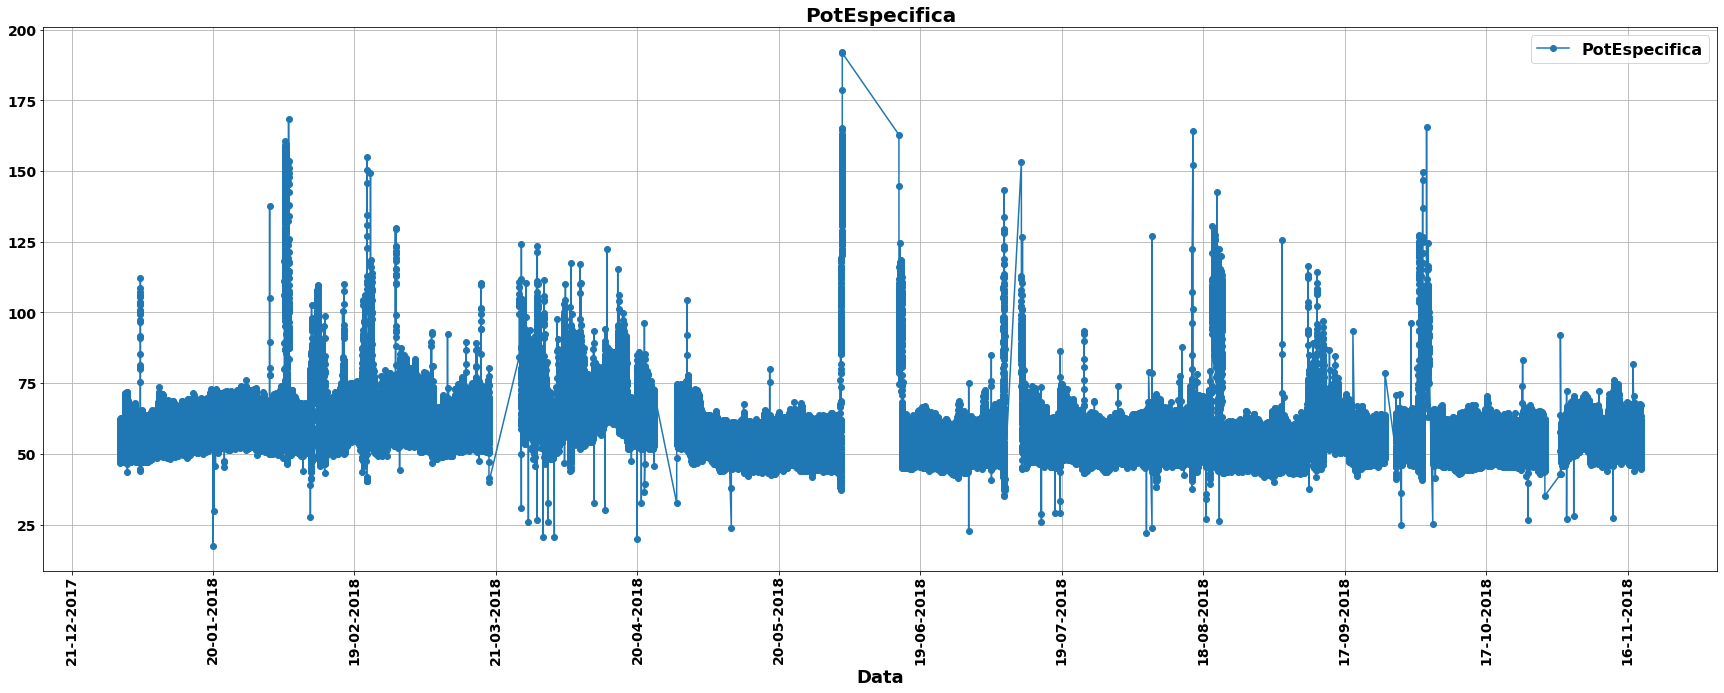

In [19]:
start_date = '01/01/2018'
end_date = '01/01/2019'

for var in df.columns:
    plot_variables_full(df,[var],start_date,end_date, days_interval=30)